# MICrONS NWB tutorial

This tutorial demonstrates how to access the [MICrONS functional data](https://dandiarchive.org/dandiset/000402/draft) using `dandi`.

The functional data from the [MICrONS project](https://www.microns-explorer.org/cortical-mm3) contains calcium imaging recorded from multiple cortical visual areas and behavioral measurements while a mouse viewed natural movies and parametric stimuli.


#### Contents:
* [Downloading NWB files](#download-nwb)
* [Reading NWB files](#read-nwb)
* [Access data and metadata](#access-nwb)
* [View NWB files with NWBWidgets](#view-nwb)
* [Streaming NWB files](#stream-nwb)

## Downloading NWB files <a class="anchor" id="download-nwb"></a>

This section demonstrates how to download one of the sessions from this dataset using `dandi`. 

In [11]:
from dandi.dandiapi import DandiAPIClient
from dandi.download import download as dandi_download

dandiset_id = "000402"
file_path = "sub-17797/sub-17797_ses-9+4_behavior+image+ophys.nwb" # file size ~67GB

# The folder where the file will be downloaded
dandiset_folder_path = "microns/nwbfiles/"

# The file path on DANDI
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(file_path)
    dandiset_url = asset.api_url

# Download the file
dandi_download(urls=dandiset_url, output_dir=dandiset_folder_path, get_metadata=True, get_assets=True)

PATH                                       SIZE    DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-17797_ses-9+4_behavior+image+ophys.nwb 66.8 GB 66.8 GB          100%    ok    done                   
Summary:                                   66.8 GB 66.8 GB                        1 done                 
                                                   100.00%                                               


In [18]:
# Downloading all NWB files for this dandiset

# dandiset_url = "https://dandiarchive.org/dandiset/000402/draft"
# dandi_download(urls=dandiset_url, output_dir=dandiset_folder_path, get_metadata=True, get_assets=True)

## Reading NWB files <a class="anchor" id="read-nwb"></a>

This section demonstrates how to read the NWB file using `NWBHDF5IO`. 

In [296]:
from pathlib import Path
from pynwb import NWBHDF5IO

nwbfile_path = Path(dandiset_folder_path) / "sub-17797_ses-9+4_behavior+image+ophys.nwb"

# Read the nwb file
io = NWBHDF5IO(nwbfile_path, mode='r')
nwbfile = io.read()

# Get the fields within the NWB file
nwbfile.fields


{'session_description': 'Contains calcium imaging recorded from multiple cortical visual areas and behavioral measurements while a mouse viewed natural movies and parametric stimuli. The structural ids are added as plane segmentation columns from the CAVE database on 2023-02-15. To access the latest revision see the notebook that is linked to the dandiset. The structural ids might not be present for all plane segmentations.',
 'identifier': '5d2ee583-6a13-4cec-a660-8411fa9041c4',
 'session_start_time': datetime.datetime(2018, 3, 9, 0, 0, tzinfo=tzlocal()),
 'timestamps_reference_time': datetime.datetime(2018, 3, 9, 0, 0, tzinfo=tzlocal()),
 'file_create_date': [datetime.datetime(2023, 2, 15, 20, 1, 27, 260016, tzinfo=tzlocal())],
 'related_publications': ('https://doi.org/10.1101/2021.07.28.454025',),
 'acquisition': {'EyeTracking': EyeTracking pynwb.behavior.EyeTracking at 0x140275109547696
  Fields:
    spatial_series: {
      eye_position <class 'pynwb.behavior.SpatialSeries'>
    }

## Access data and metadata <a class="anchor" id="access-nwb"></a>

This section demonstrates how to access the data in the NWB files.


### Subject

The `nwbfile.subject` field holds information about the experimental subject, such as age (in [ISO 8601 Duration format](https://en.wikipedia.org/wiki/ISO_8601#Durations)), sex, and species in latin binomial nomenclature.

In [27]:
# Access the subject metadata
nwbfile.subject

subject pynwb.file.Subject at 0x140415845989824
Fields:
  age: P75D/P81D
  sex: M
  species: Mus musculus
  subject_id: 17797

### Trials

#### Clip

This stimulus condition is composed of 10 second clips. The trials for this condition can be accessed as `nwbfile.intervals["Clip"]`.

In [312]:
# View the description for this stimulus type
nwbfile.intervals["Clip"].description

'Composed of 10 second clips from cinematic releases, Sports-1M dataset, or custom rendered first person POV videos in 3D environment in Unreal Engine.'

In [279]:
nwbfile.intervals["Clip"].to_dataframe()

,start_time,stop_time,stimulus_type,condition_hash,movie_name,short_movie_name,duration
id,,,,,,,
4,269.464581,279.431084,stimulus.Clip,okYfMyn8qc2ClgvpS7WG,2009 Skijoring Event in Whitefish Montana (par...,sports1m,10.0
5,279.531081,289.497598,stimulus.Clip,NHlF8hOkZ6psFRIVhB6N,ancienttomb_107-1-4-70-0_54.165.28.255,Rendered,10.0
6,289.597593,299.564101,stimulus.Clip,AxNNo310kAl9uUSr+hXS,medievalsewer_009-1-6-70-0_107.23.36.15,Rendered,10.0
7,299.664089,309.630596,stimulus.Clip,mjtZRmGqaXCHGB59txoI,Powaqqatsi: Life in Transformation (1988),Cinematic,10.0
8,309.730601,319.697093,stimulus.Clip,W50xYLSTlUixv1tOfuSJ,2011 Boulder Cup Cyclocross Elite Women,sports1m,10.0
...,...,...,...,...,...,...,...
459,5229.733599,5239.700111,stimulus.Clip,BmdZ8rRGTB6ueDkz+Kr/,shintonight_095-1-13-70-0_54.89.40.102,Rendered,10.0
460,5239.800111,5249.766615,stimulus.Clip,WslKzH0v/OEqVTLiw468,2011 June 14 Midweek MTB Corner Canyon XC Moun...,sports1m,10.0
461,5249.866617,5259.833112,stimulus.Clip,eNJ7fFpiRbVfX48l845P,2011 August 2 Midweek MTB Solitude XC Mountain...,sports1m,10.0


#### Monet2

This stimulus condition is generated from smoothened Gaussian noise and a global orientation and direction component. The trials for this condition can be accessed as `nwbfile.intervals["Monet2"]`.

In [271]:
nwbfile.intervals["Monet2"].to_dataframe()

,start_time,stop_time,stimulus_type,condition_hash,rng_seed,duration,blue_green_saturation,pattern_width,pattern_aspect,temp_kernel,temp_bandwidth,ori_coherence,ori_fraction,ori_mix,num_directions
id,,,,,,,,,,,,,,,
0,209.198904,224.181996,stimulus.Monet2,WD0uyxvusJmVxfeKu9mZ,1.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
1,224.281990,239.265071,stimulus.Monet2,kEq0YeYOSSBtM1ZkWA1a,4.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
2,239.348411,254.331497,stimulus.Monet2,clN4ica4q7huSnWVFTFi,3.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
3,254.414823,269.397922,stimulus.Monet2,NnOFXtdjpcasByEfeJf9,2467.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
50,752.506706,767.489783,stimulus.Monet2,yv/S61fYnDSQcA9J6Nk8,7.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
51,767.556454,782.539544,stimulus.Monet2,D7Qz0+GnoO+epUXZjqzp,2791.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
52,782.622873,797.605962,stimulus.Monet2,GHn0W57E+2PS+Qr5yD2r,8.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
53,797.689290,812.672377,stimulus.Monet2,+rgSVBVRE8Ij1WNhq8ZW,2.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16
78,1054.301757,1069.284848,stimulus.Monet2,YLuStB2eXkgOS+Cescsy,9.0,15.0,0,72,1.7,hamming,4.0,2.5,1.0,1.0,16


#### Trippy

The stimulus table for the cosine of a smoothened noise phase movie can be accessed as `nwbfile.intervals["Trippy"]`.

In [280]:
nwbfile.intervals["Trippy"].to_dataframe()

,start_time,stop_time,stimulus_type,condition_hash,rng_seed,texture_height,texture_width,duration,xnodes,ynodes,up_factor,temp_freq,temp_kernel_length,spatial_freq
id,,,,,,,,,,,,,,
10,329.863606,344.846688,stimulus.Trippy,e9eVr8Agj8TsRJR3XEBg,1007.0,90,160,15.0,12,6,24,4.0,61,0.08
11,344.930015,359.913113,stimulus.Trippy,tRgm529SPpQspr220FRm,2.0,90,160,15.0,12,6,24,4.0,61,0.08
12,359.996445,374.979541,stimulus.Trippy,hhWRsNy4ljt4M1PtvZ3u,6.0,90,160,15.0,12,6,24,4.0,61,0.08
13,375.062862,390.045950,stimulus.Trippy,ZJvulWBItHtLlDVkIntm,8.0,90,160,15.0,12,6,24,4.0,61,0.08
94,1235.298793,1250.281879,stimulus.Trippy,EhwIk1vM51LHZPE6xFZX,5.0,90,160,15.0,12,6,24,4.0,61,0.08
95,1250.365199,1265.348296,stimulus.Trippy,XkDkQYCXM1O5KmU02Mo7,2145.0,90,160,15.0,12,6,24,4.0,61,0.08
96,1265.431619,1280.414710,stimulus.Trippy,FwG4V5nAZdXPlcAEu/X9,9.0,90,160,15.0,12,6,24,4.0,61,0.08
97,1280.498041,1295.481136,stimulus.Trippy,Vdi70xOyBQEeDGhPVulx,3.0,90,160,15.0,12,6,24,4.0,61,0.08
104,1355.963470,1370.946566,stimulus.Trippy,HYMAPvhVPuTytONbBIUr,2844.0,90,160,15.0,12,6,24,4.0,61,0.08


### Stimulus movie data

The visual stimulus composed of parametric stimuli and natural movie clips.

The movie data is stored in an `ImageSeries` object. 

In [38]:
# Access the fields for movie data
nwbfile.acquisition["Video: stimulus_17797_9_4_v4"]

Video: stimulus_17797_9_4_v4 pynwb.image.ImageSeries at 0x140415845979648
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (348291, 144, 256, 3), type "|u1">
  description: The visual stimulus is composed of natural movie clips ~60 fps.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (348291,), type "<f8">
  timestamps_unit: seconds
  unit: Frames

Data arrays are read passively from the NWB file. Accessing the data attribute of the `ImageSeries` object does not read the data values, but presents an `HDF5` object that can be indexed to read data.

The frames are stored in a 4D array where the first dimension is time (frame), the second and third dimenion represents the size of the image and the last dimension are the RGB channels.

In [299]:
movie = nwbfile.acquisition["Video: stimulus_17797_9_4_v4"]

nwbfile.acquisition["Video: stimulus_17797_9_4_v4"].data

<HDF5 dataset "data": shape (348291, 144, 256, 3), type "|u1">

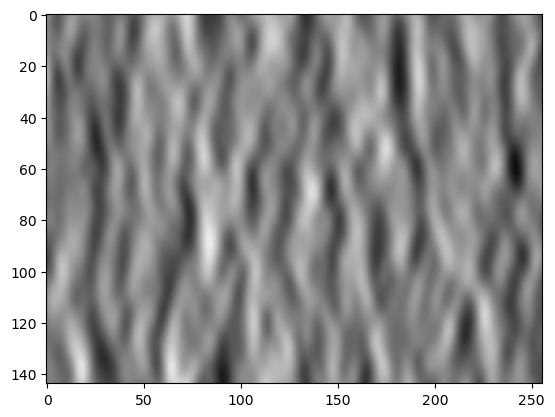

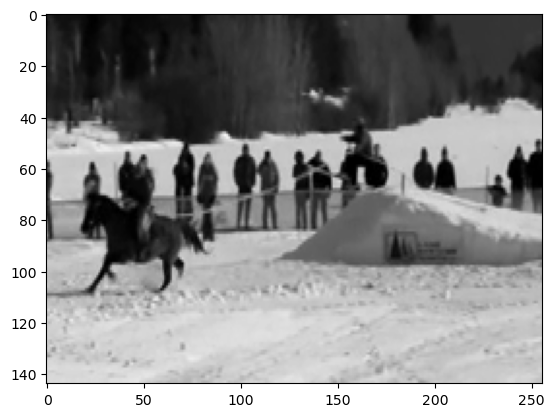

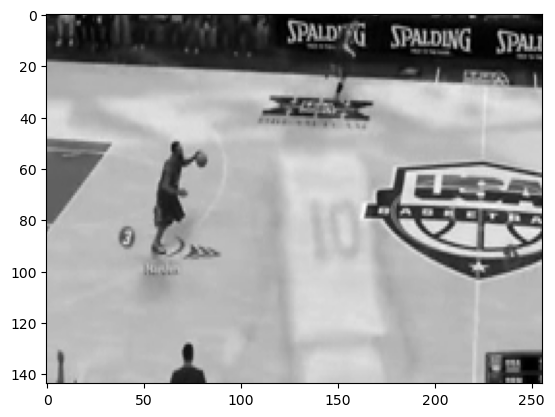

In [93]:
# Visualize frames from the movie.

from matplotlib import pyplot as plt

plt.imshow(movie.data[11900], aspect="auto")
plt.show()

plt.imshow(movie.data[15680], aspect="auto")
plt.show()

plt.imshow(movie.data[33900], aspect="auto")
plt.show()

You can use the `[:]` operator to read the entire data array into memory. (e.g. `movie.data[:]`)

To read only a portion of data at a time, index or slice into the data attribute just like if you were indexing or slicing a numpy array.


In [95]:
# Read the first 500 frames from the movie data

movie.data[:500].shape

(500, 144, 256, 3)

### Two Photon Imaging

The two photon data contains 50000 imaging volumes collected at ~8.6 Hz, with six fields per volume.
The center of the volume was placed at the junction of primary visual cortex (VISp) and three higher visual areas, lateromedial area (VISlm), rostrolateral area (VISrl) and anterolateral area (VISal).

The imaging data for each field is stored in a `TwoPhotonSeries` object which can be accessed from `nwbfile.acqusition`.

The information about the imaging plane can accessed as `nwbfile.acquisition["TwoPhotonSeries1"].imaging_plane` or from `nwbfile.imaging_planes["ImagingPlane1"]`.

In [180]:
# The two photon imaging data for field 1
nwbfile.acquisition["TwoPhotonSeries1"]

TwoPhotonSeries1 pynwb.ophys.TwoPhotonSeries at 0x140415845978256
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (50000, 248, 440), type "<i2">
  description: Calcium imaging data for field 1 at 8.61754 Hz and 0.00015 meters depth.
  dimension: <HDF5 dataset "dimension": shape (2,), type "<i8">
  field_of_view: <HDF5 dataset "field_of_view": shape (2,), type "<f8">
  imaging_plane: ImagingPlane1 pynwb.ophys.ImagingPlane at 0x140415845980896
Fields:
  conversion: 1.0
  description: The imaging plane for field 1 at 0.00015 meters depth.
  device: Microscope pynwb.device.Device at 0x140415845981136
Fields:
  description: two-photon random access mesoscope

  excitation_lambda: 920.0
  imaging_rate: nan
  indicator: GCaMP6
  location: VISp,VISrl,VISlm,VISal
  optical_channel: (
    OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
  )
  unit: meters

  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (5000

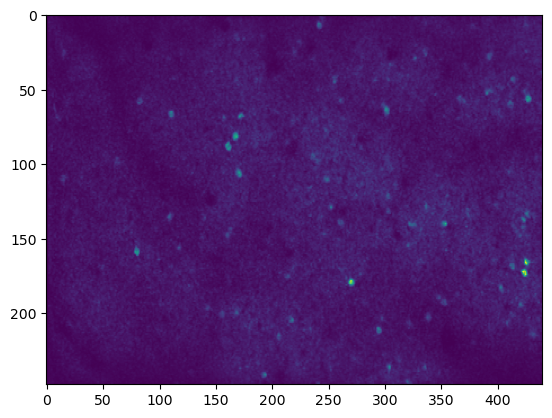

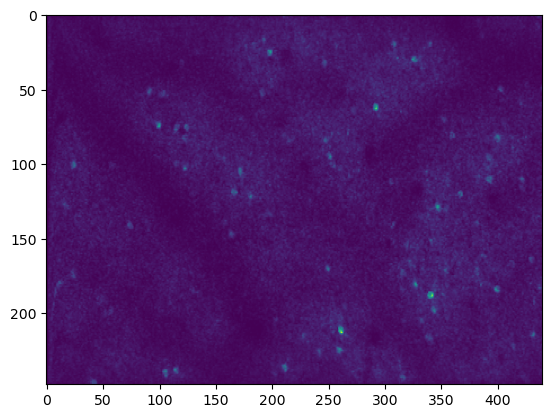

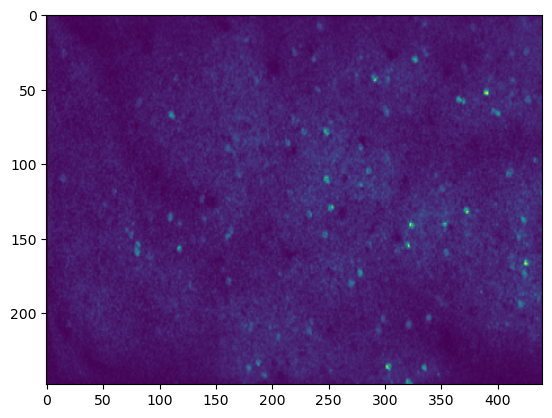

In [152]:
# Visualize the imaging data.

from matplotlib import pyplot as plt

plt.imshow(nwbfile.acquisition["TwoPhotonSeries1"].data[2200], aspect="auto")
plt.show()

plt.imshow(nwbfile.acquisition["TwoPhotonSeries2"].data[2200], aspect="auto")
plt.show()

plt.imshow(nwbfile.acquisition["TwoPhotonSeries3"].data[2200], aspect="auto")
plt.show()


### Fluorescence traces

The "ophys" processing module contains the fluorescence traces, and image segmentations which can be accessed as `nwbfile.processing["ophys"]`. 

The fluorescence traces for each field are stored in `RoiResponseSeries` objects in a `Fluorescence` container within the "ophys" processing module as `nwbfile.processing["ophys"].data_interfaces`. 


In [176]:
fluorescence = nwbfile.processing["ophys"].data_interfaces["Fluorescence"]

fluorescence

Fluorescence pynwb.ophys.Fluorescence at 0x140415845990208
Fields:
  roi_response_series: {
    RoiResponseSeries1 <class 'pynwb.ophys.RoiResponseSeries'>,
    RoiResponseSeries2 <class 'pynwb.ophys.RoiResponseSeries'>,
    RoiResponseSeries3 <class 'pynwb.ophys.RoiResponseSeries'>,
    RoiResponseSeries4 <class 'pynwb.ophys.RoiResponseSeries'>,
    RoiResponseSeries5 <class 'pynwb.ophys.RoiResponseSeries'>,
    RoiResponseSeries6 <class 'pynwb.ophys.RoiResponseSeries'>
  }

In [181]:
# The fluorescence traces for field 1 
fluorescence.roi_response_series['RoiResponseSeries1']

RoiResponseSeries1 pynwb.ophys.RoiResponseSeries at 0x140415846138016
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (50000, 1410), type "<f4">
  description: The fluorescence traces for field 1
  interval: 1
  offset: 0.0
  resolution: -1.0
  rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
  timestamps: <HDF5 dataset "timestamps": shape (50000,), type "<f8">
  timestamps_unit: seconds
  unit: n.a.

The traces are stored in a 2D array where the first dimension is time, the second dimenion is the number of ROIs for this field.

In [183]:
traces = fluorescence.roi_response_series['RoiResponseSeries1'].data

traces.shape

(50000, 1410)

The image masks for each field are stored in `PlaneSegmentation` objects in an `ImageSegmentation` container within the "ophys" processing module.

In [314]:
image_segmentation = nwbfile.processing["ophys"].data_interfaces["ImageSegmentation"]

image_segmentation

ImageSegmentation pynwb.ophys.ImageSegmentation at 0x140275109558208
Fields:
  plane_segmentations: {
    PlaneSegmentation1 <class 'pynwb.ophys.PlaneSegmentation'>,
    PlaneSegmentation2 <class 'pynwb.ophys.PlaneSegmentation'>,
    PlaneSegmentation3 <class 'pynwb.ophys.PlaneSegmentation'>,
    PlaneSegmentation4 <class 'pynwb.ophys.PlaneSegmentation'>,
    PlaneSegmentation5 <class 'pynwb.ophys.PlaneSegmentation'>,
    PlaneSegmentation6 <class 'pynwb.ophys.PlaneSegmentation'>
  }

In [315]:
# The plane segmentation for field 1 
image_segmentation.plane_segmentations["PlaneSegmentation1"]

PlaneSegmentation1 pynwb.ophys.PlaneSegmentation at 0x140275109559984
Fields:
  colnames: ['image_mask' 'mask_type']
  columns: (
    image_mask <class 'hdmf.common.table.VectorData'>,
    mask_type <class 'hdmf.common.table.VectorData'>
  )
  description: The output from segmenting field 1 contains the image masks (weights and mask classification) and the structural ids extracted from the CAVE database on 2023-02-15. To access the latest revision from the live resource see the notebook that is linked to the dandiset. The structual ids might not exist for all plane segmentations.
  id: id <class 'hdmf.common.table.ElementIdentifiers'>
  imaging_plane: ImagingPlane1 pynwb.ophys.ImagingPlane at 0x140275109550960
Fields:
  conversion: 1.0
  description: The imaging plane for field 1 at 0.00015 meters depth.
  device: Microscope pynwb.device.Device at 0x140275109551200
Fields:
  description: two-photon random access mesoscope

  excitation_lambda: 920.0
  imaging_rate: nan
  indicator: GCa

In [316]:
# The image masks for field 1
image_mask = image_segmentation.plane_segmentations["PlaneSegmentation1"]["image_mask"][:]

image_mask.shape

(1410, 440, 248)

In [214]:
# The image classification for field 1
mask_type = image_segmentation.plane_segmentations["PlaneSegmentation1"]["mask_type"][:]

mask_type[:10]

array(['soma', 'artifact', 'soma', 'soma', 'soma', 'soma', 'soma', 'soma',
       'soma', 'soma'], dtype=object)

The functional data were co-registered with electron microscopy (EM) data. The structural identifiers of the matched cells are added as plane segmentation columns extracted from the CAVE database. To access the latest revision see the notebook [this notebook](https://github.com/cajal/microns_phase3_nda/blob/master/notebooks/Overview_Matched_Cell_Functional_Data.ipynb). The structural ids might not be present for all plane segmentations.

The "cave_ids" are the identifiers from the CAVE database (can be more than one for a given cell), "pt_position_x", "pt_position_y" and "pt_position_z" corresponds to the location in 4,4,40 nm voxels at a cell body for the cell, 
"pt_supervoxel_id" is the ID of the supervoxel from the watershed segmentation, "pt_root_id" is the ID of the segment/root_id from the Proofread Segmentation (v117).

In [244]:
# The structural ids for field 4 
image_segmentation.plane_segmentations["PlaneSegmentation4"][:].dropna()

,image_mask,mask_type,cave_ids,pt_supervoxel_id,pt_root_id,pt_x_position,pt_y_position,pt_z_position
id,,,,,,,,
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[4310.0],1.120332e+17,8.646911e+17,343888.0,107008.0,15649.0
8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[2243.0],1.132301e+17,8.646911e+17,352640.0,111392.0,19327.0
12,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[2244.0],1.136521e+17,8.646911e+17,355616.0,109728.0,20087.0
16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[8945.0],1.138626e+17,8.646911e+17,356899.0,105465.0,22206.0
26,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[2245.0],1.116119e+17,8.646911e+17,340608.0,113856.0,18439.0
...,...,...,...,...,...,...,...,...
1381,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[2296.0],1.047158e+17,8.646911e+17,290656.0,113904.0,21738.0
1390,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[9303.0],9.233204e+16,8.646911e+17,200481.0,122465.0,17207.0
1394,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",soma,[4360.0],1.048560e+17,8.646911e+17,291504.0,110000.0,15556.0


The average and correlation images for each field are stored in `GrayscaleImage` objects in an `Images` container within the "ophys" processing module.

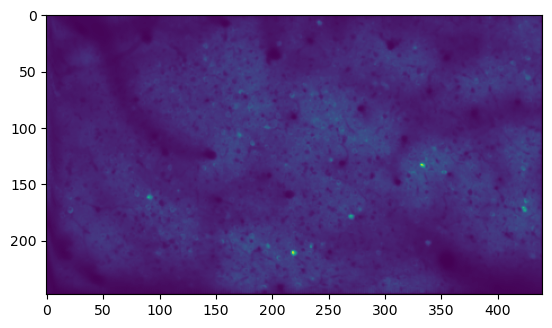

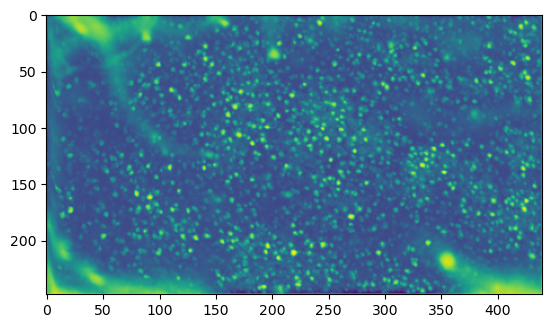

In [317]:
# The average and correlation images for field 1
segmentation_images = nwbfile.processing["ophys"].data_interfaces["SegmentationImages1"]

plt.imshow(segmentation_images.images["average"][:])
plt.show()

plt.imshow(segmentation_images.images["correlation"][:])
plt.show()

### Behavior

The raw behavior data is composed of the velocity of the treadmill, eye movements and the pupil diameter data.

The velocity of the treadmill is stored in a `TimeSeries` object.

In [104]:
# Access the treadmill velocity
nwbfile.acquisition["treadmill_velocity"]

treadmill_velocity pynwb.base.TimeSeries at 0x140415845989104
Fields:
  comments: no comments
  conversion: 0.01
  data: <HDF5 dataset "data": shape (374122,), type "<f8">
  description: Cylindrical treadmill rostral-caudal position extracted at ~60-100 Hz and converted into velocity.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (374122,), type "<f8">
  timestamps_unit: seconds
  unit: m/s

The position of the eye is stored in a `SpatialSeries` object which is stored in an `EyeTracking` container.

In [115]:
nwbfile.acquisition["EyeTracking"]

EyeTracking pynwb.behavior.EyeTracking at 0x140415845978064
Fields:
  spatial_series: {
    eye_position <class 'pynwb.behavior.SpatialSeries'>
  }

In [119]:
nwbfile.acquisition["EyeTracking"].spatial_series["eye_position"]

eye_position pynwb.behavior.SpatialSeries at 0x140415845978208
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (101678, 2), type "<f8">
  description: The x,y position of the pupil.The values are estimated in the relative pixel units.
  interval: 1
  offset: 0.0
  reference_frame: unknown
  resolution: -1.0
  timestamps: pupil_minor_radius pynwb.base.TimeSeries at 0x140415845978448
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (101678,), type "<f8">
  description: Minor radius extracted from the pupil tracking ellipse.The values are estimated in the relative pixel units.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamp_link: (
    eye_position <class 'pynwb.behavior.SpatialSeries'>,
    pupil_major_radius <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (101678,), type "<f8">
  timestamps_unit: seconds
  unit: px

  timestamps_unit: seconds
  unit: px

The pupil major and minor radius are stored as `TimeSeries` objects and they can be accessed from an `EyeTracking` container.

In [127]:
nwbfile.acquisition['PupilTracking'].time_series["pupil_major_radius"]

pupil_major_radius pynwb.base.TimeSeries at 0x140415845980176
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (101678,), type "<f8">
  description: Major radius extracted from the pupil tracking ellipse.The values are estimated in the relative pixel units.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: pupil_minor_radius pynwb.base.TimeSeries at 0x140415845978448
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (101678,), type "<f8">
  description: Minor radius extracted from the pupil tracking ellipse.The values are estimated in the relative pixel units.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamp_link: (
    eye_position <class 'pynwb.behavior.SpatialSeries'>,
    pupil_major_radius <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (101678,), type "<f8">
  timestamps_unit: seconds
  unit: px

  timestamps_unit: seconds
  unit: px

In [123]:
nwbfile.acquisition['PupilTracking'].time_series["pupil_minor_radius"]

pupil_minor_radius pynwb.base.TimeSeries at 0x140415845978448
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (101678,), type "<f8">
  description: Minor radius extracted from the pupil tracking ellipse.The values are estimated in the relative pixel units.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamp_link: (
    eye_position <class 'pynwb.behavior.SpatialSeries'>,
    pupil_major_radius <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (101678,), type "<f8">
  timestamps_unit: seconds
  unit: px

### Time references

The timestamps in an NWB file should be in seconds with respect to the global start time of the session.
The original time references were relative to scan start which would have produced negative timestamps for the behavior data. Therefore, all times were shifted to the earliest behavioral timestamp.

In this file for instance, time `0.0` corresponds to the first timestamp for the treadmill velocity data while the two photon imaging started `10.899` seconds after.

In [310]:

nwbfile.acquisition["treadmill_velocity"].timestamps[0]

0.0

In [311]:
nwbfile.acquisition["TwoPhotonSeries1"].timestamps[0]

10.899238834999977

### View NWB files <a class="anchor" id="view-nwb"></a>

This section demonstrates how to visualize the contents of an NWB file interactively using `NWBWidgets`.

#### Visualize an in-memory NWB file

Explose the NWB file using `nwb2widget`.

In [282]:
from nwbwidgets import nwb2widget

nwb2widget(nwbfile)

#### Visualize NWB file using Panel

Browse NWB files that are stored locally or remotely (e.g. DANDI) using `Panel`.
Use the GUI to navigate to the file (local) or use the "DANDI" button to stream the data from DANDI without having to download it.

In [284]:
from nwbwidgets.panel import Panel

Panel()

Panel(children=(HBox(children=(VBox(children=(RadioButtons(layout=Layout(width='100px'), options=('Local dir',…

## Streaming NWB files <a class="anchor" id="stream-nwb"></a>

This section demonstrates how to access the files on DANDI without downloading them.
Based on the [Streaming NWB files](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html) tutorial from `PyNWB`.

In [293]:
from dandi.dandiapi import DandiAPIClient
from fsspec.implementations.cached import CachingFileSystem
import fsspec
from h5py import File
from pynwb import NWBHDF5IO


# Get the location of the file on DANDI
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(file_path)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

# Create a virtual filesystem based on the http protocol and use caching to save accessed data to RAM.
fs = CachingFileSystem(
    fs=fsspec.filesystem("http"),
    cache_storage="nwb-cache",  # Local folder for the cache
)

# Open the file with NWBHDF5IO
with fs.open(s3_url, "rb") as f:
    with File(f) as file:
        with NWBHDF5IO(file=file, load_namespaces=True) as io:
            nwbfile = io.read()
            # Load the eye position data
            eye_position_data = nwbfile.acquisition["EyeTracking"].spatial_series["eye_position"].data[:]

eye_position_data.shape

(101678, 2)